<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   ###### **Data Cleaning:** Checking for null values and based on their number either droping them or replacing with mean, median, mode based on the type and description of data. Droping decscrete and catagorical variables that have highly skewed histograms.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data. In case of catagorical variables it also helps in feature selection.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit. Here we need to use Decision Tree.

*   ###### **Evalution:** In this case we are using R2 Score to determine the accuracy of the predicting model.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install PyDrive
!pip install PyDrive

#Import modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Get the Shareable link
downloaded = drive.CreateFile({'id':"19NaQXE6zxcifidYjX7ec1T17vWkGfLCP"})   
downloaded.GetContentFile('biddings.csv')       

#Read data
df = pd.read_csv("biddings.csv")

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


### Reading Null Values

In [ ]:
Null = []
for i in df:
    Null.append((i, df[i].isna().mean()*100))
Null = pd.DataFrame(Null,columns=['class','per'])
print(Null)

      class  per
0         0  0.0
1         1  0.0
2         2  0.0
3         3  0.0
4         4  0.0
..      ...  ...
84       84  0.0
85       85  0.0
86       86  0.0
87       87  0.0
88  convert  0.0

[89 rows x 2 columns]


*As we can see that there is no nul values in the so no data is missing*

### Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


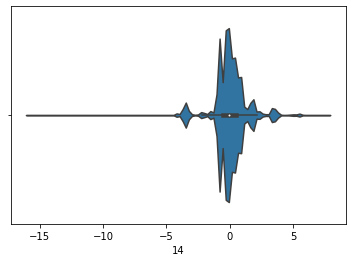

In [ ]:
sns.violinplot(df['14'])

*With the help of this we came up with the thing that there is great variance within the target class with maximum nos occuring with 0*

In [ ]:
c = df.columns
df[c[-1]].value_counts()

0    998092
1      1908
Name: convert, dtype: int64

In [ ]:
cols = [col for col in df.columns if col not in ["convert"]]
X = df[cols]

####Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
trans = Normalizer().fit(X)
X=trans.transform(X)

As from above we observe that that there is lot of values in 0 of the target class which becomes very bias for the classifier so, we apply Under_Sampling to overcome this issue.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

y=df["convert"]
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X, y = rus.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Train_Test_Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
model =LR()

# Fitting the model
model.fit(X_train, y_train)

# Getting the training score
print("Training Score:",model.score(X_train, y_train)*100)

Training Score: 66.08781127129751


In [ ]:
print("Testing Score:",model.score(X_test, y_test)*100)

Testing Score: 63.87434554973822


## Decision Tree

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

# Fitting Model
model.fit(X_train, y_train)

# Getting the training score
print("Training Score:",model.score(X_train, y_train)*100)

Training Score: 99.04980340760157


In [ ]:
print("Testing Score:",model.score(X_test, y_test)*100)

Testing Score: 56.41361256544503
